# Lesson 2 Homework: Task about lakes
### By: Maksym Lushpak

In [74]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

Generating an array of random integers

In [165]:
# Colors to use when plotting
COLOR_MOUNTAINS = "brown"
COLOR_LAKES = "cyan"

# Dataset values
MIN_VALUE = 1
MAX_VALUE = 100
VALUES_COUNT = 20

np.random.seed(datetime.now().microsecond)
values = np.random.randint(MIN_VALUE, MAX_VALUE, VALUES_COUNT)
values

array([69, 49, 85, 39, 20, 75, 86, 47, 85, 22, 14, 45, 38, 23, 70, 73, 97,
       26, 33, 14])

Plotting the values

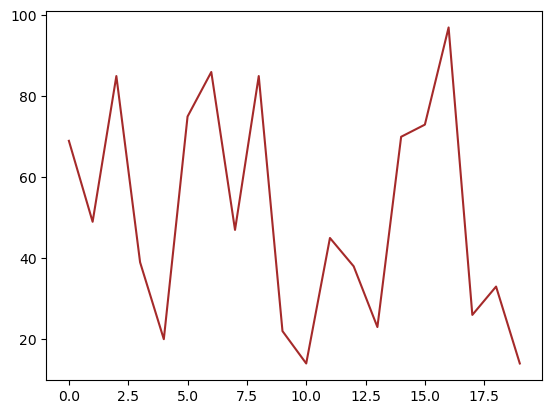

In [166]:
plt.plot(values, c=COLOR_MOUNTAINS)

Defining a Lake class, which will calculates lake depth, based on it's edge coordinates

In [167]:
class Lake:

    def __init__(self, left_edge: int, right_edge: int, datapool: list[int] = values):
        self.datapool = datapool
        self.left_edge = left_edge
        self.right_edge = right_edge
        self.deepest_point = min(datapool[left_edge:right_edge + 1]) # Elevation of the deepest point of the lake
        self.depth = min(datapool[left_edge], datapool[right_edge]) - self.deepest_point # Lake depth - defined as the difference between lower on the edges and the deepest point
    
    # Method to plot the lake
    def plot(self):
        lake_data = self.datapool[self.left_edge:self.right_edge + 1]
        plt.plot(range(self.left_edge, self.right_edge + 1), lake_data, c=COLOR_LAKES)

We go through the the mountains, starting from the left and find all the lakes in it.

We start from the left edge and finish searching for a lake once we reach a point higher than it.

In [168]:
lakes = []

left_edge = 0
right_edge = left_edge + 1

while right_edge < VALUES_COUNT - 1:
    while values[right_edge] < values[left_edge] and right_edge < VALUES_COUNT - 1:
        right_edge += 1

    # If right edge is reached, we check if it was going downhill and find the nearest peak
    if right_edge == VALUES_COUNT - 1:
        while values[right_edge] < values[right_edge - 1]:
            right_edge -= 1
        lakes.append(Lake(left_edge, right_edge))
        break

    # Only add lake to the list if it has more than 3 points
    if right_edge > left_edge + 1:
        lakes.append(Lake(left_edge, right_edge))
    
    left_edge = right_edge
    right_edge = left_edge + 1


Now, we find which lake is the deepest

In [169]:
deepest_lake = sorted(lakes, key=lambda x: x.depth)[-1]

And plot it:

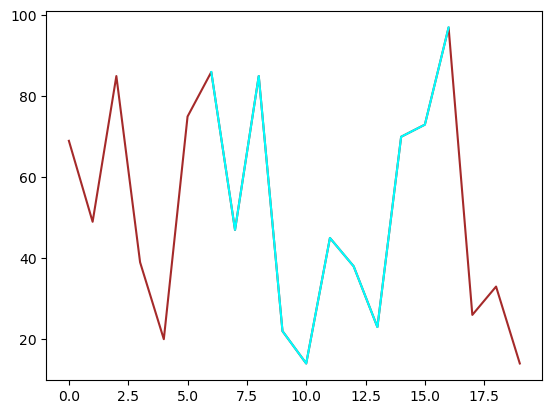

In [170]:
plt.plot(values, c=COLOR_MOUNTAINS)
deepest_lake.plot()

In [171]:
print(f"The deepest lake stretches from index {deepest_lake.left_edge} at elevation {values[deepest_lake.left_edge]} m until index {deepest_lake.right_edge} at elevation {values[deepest_lake.right_edge]} m")
print(f"The deepest point of the lake has an absolute elevation of {deepest_lake.deepest_point} m")
print(f"Lake depth (from the deepest point up to the lowest edge) is {deepest_lake.depth} m")

The deepest lake stretches from index 6 at elevation 86 m until index 16 at elevation 97 m
The deepest point of the lake has an absolute elevation of 14 m
Lake depth (from the deepest point up to the lowest edge) is 72 m
